In [1]:
from importlib import reload
import germibeta as G

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
F = []
with open('PF00009_D.txt') as f:
    for linea in f:
        if(len(linea)>0):
            F += [int(x) for y in linea.split(",") for x in y if x!='\n']

F = sorted(F, reverse=True)

<Axes: >

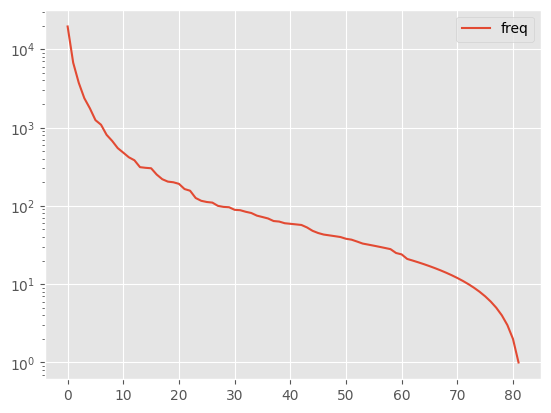

In [3]:
F = pd.read_csv('fbc_brown.csv', header=None)
F.columns = ['freq']
F.plot(logy=True,)

In [4]:
gg.ajuste(F, metodo='lm')

NameError: name 'gg' is not defined

In [16]:
reload(G)
gg = G.Germibeta()
gg.carga_archivo('./fbc_brown.csv')
gg.ajuste(metodo='lm')

(array([  1.34278531,   0.7560213 , 501.90332017]),
 array([[ 4.39126347e-04, -2.60280158e-04,  1.21026959e+00],
        [-2.60280158e-04,  3.09133712e-04, -9.85364067e-01],
        [ 1.21026959e+00, -9.85364067e-01,  3.83768744e+03]]),
 0.9255900552537332)

In [197]:
a, b, A, N, r2 = gg.ajuste(metodo='loglog')
a, b, A, r2

(1.3617174880825507, 0.73704234854528, 582.17255373865, -0.0546945152794025)

Graficamos

In [17]:
gg.params

array([  1.34278531,   0.7560213 , 501.90332017,  82.        ,
         0.92559006])

In [18]:
N= len(F)
R= np.arange(1, len(F) + 1)
F_model =G.germibeta(R, *gg.params)

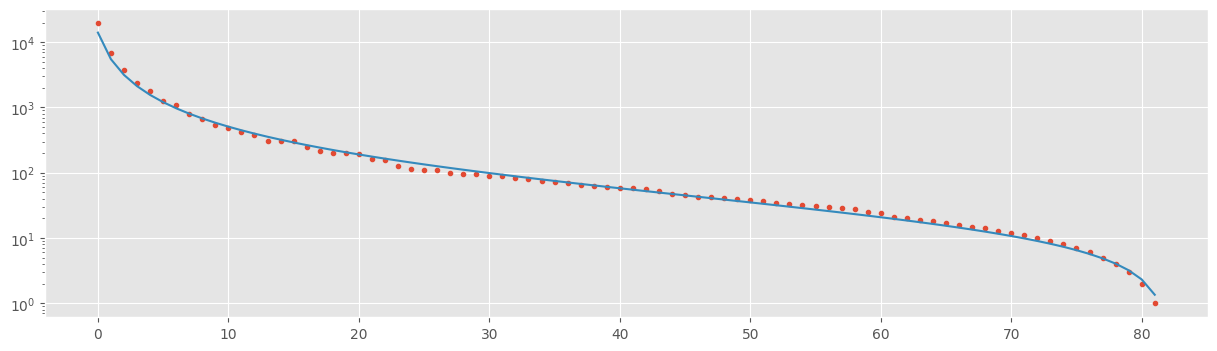

In [19]:
fig, ax = plt.subplots(1,1,figsize=(15,4))
ax.semilogy(F, '.')
ax.semilogy(F_model)

In [20]:
y = F.to_numpy().reshape(1,-1)[0]
len(y), N, gg.params

(82,
 82,
 array([  1.34278531,   0.7560213 , 501.90332017,  82.        ,
          0.92559006]))

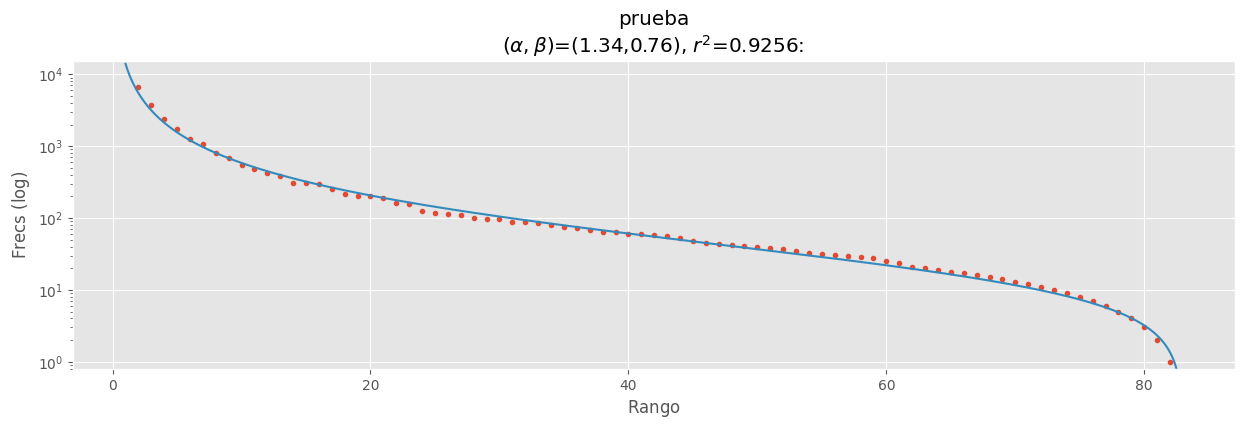

In [21]:

fig, ax = plt.subplots(1,1,figsize=(15,4))
G.graf_datos(y, gg.params, 'prueba', 'prueba', ax=ax)